<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import math

In [2]:
import sys

In [4]:
import os

In [8]:
import numpy as np

In [37]:
%matplotlib inline

In [11]:
from numpy.random import random

In [12]:
from matplotlib import pyplot as plt

In [13]:
from matplotlib import rcParams

In [14]:
from matplotlib import animation

In [15]:
from matplotlib import rc

In [16]:
from __future__ import print_function

In [17]:
from __future__ import division

In [18]:
from ipywidgets import interact

In [19]:
from ipywidgets import interactive

In [20]:
from ipywidgets import fixed

In [21]:
from ipywidgets.widgets import *

In [22]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [23]:
def lin(a,b,x): return a*x+b

In [24]:
a=3.
b=8.

In [25]:
n=30
x = random(n)
y = lin(a,b,x)

In [26]:
x

array([0.7737, 0.514 , 0.6227, 0.2741, 0.876 , 0.5996, 0.7729, 0.0565, 0.1552, 0.6325, 0.7041,
       0.9901, 0.5627, 0.2958, 0.2412, 0.8257, 0.2898, 0.5128, 0.2134, 0.6887, 1.    , 0.0088,
       0.422 , 0.0249, 0.2912, 0.9551, 0.8843, 0.598 , 0.5869, 0.0922])

In [27]:
y

array([10.3212,  9.5419,  9.8681,  8.8224, 10.6279,  9.7988, 10.3187,  8.1694,  8.4656,  9.8976,
       10.1124, 10.9703,  9.688 ,  8.8874,  8.7236, 10.4772,  8.8694,  9.5383,  8.6401, 10.066 ,
       11.    ,  8.0263,  9.266 ,  8.0746,  8.8736, 10.8654, 10.6528,  9.7941,  9.7607,  8.2767])

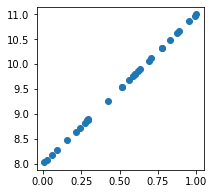

In [28]:
plt.scatter(x,y)

In [29]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [30]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.139926779432786

In [31]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [32]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [34]:
#pip install ffmpeg-python 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani